## This code is to find out the different of each epoch and batch size combination

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [2]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path1 = parent_path / 'Data/googlenet/fashion_mnist/'
data_path2 = parent_path / 'Data/googlenet/cifar100/'
print('The data path is:', data_path1)
print('The data path is:', data_path2)

The current path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/code
The parent path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet/fashion_mnist
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet/cifar100


### extract data

In [3]:
batch_sizes = [256]
epochs = [20]
rounds = 1

#### read all the data from all the folders

In [4]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder1_names = os.listdir(data_path1)
folder2_names = os.listdir(data_path2)
print('The folder names are:', folder1_names, folder2_names)
print('The folder list is:', folder_list)

# find the common folders
common1_folders = list(set(folder_list).intersection(folder1_names))
common2_folders = list(set(folder_list).intersection(folder2_names))
# sort the common folders
common1_folders.sort()
common2_folders.sort()
print('The common folders are:', common1_folders, common2_folders)
# print(len(common_folders))

The folder names are: ['E20_B256_R0'] ['E20_B256_R0']
The folder list is: ['E20_B256_R0']
The common folders are: ['E20_B256_R0'] ['E20_B256_R0']


### analysis data

#### find the data in same epoch and batch size

In [5]:
# read the data from the common folders
data_f = data_path1 / common1_folders[0]
data_c = data_path2 / common2_folders[0]
print('The data folder is:', data_f, data_c)
# find the files in the data folder
files_f = os.listdir(data_f)
files_c = os.listdir(data_c)
print('The files are:', files_f,'\n', files_c)


The data folder is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet/fashion_mnist/E20_B256_R0 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/googlenet/cifar100/E20_B256_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy'] 
 ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']


In [6]:
# read all the files in the common folders
LayersTime_f = np.load(data_f / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_f = np.load(data_f / 'Train_part_time.npy', allow_pickle=True)
EpochTime_f = np.load(data_f / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_f = np.load(data_f / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_f = np.load(data_f / 'Train_acc.npy', allow_pickle=True)
TestAcc_f = np.load(data_f / 'Test_acc.npy', allow_pickle=True)

LayersTime_c = np.load(data_c / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_c = np.load(data_c / 'Train_part_time.npy', allow_pickle=True)
EpochTime_c = np.load(data_c / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_c = np.load(data_c / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_c = np.load(data_c / 'Train_acc.npy', allow_pickle=True)
TestAcc_c = np.load(data_c/ 'Test_acc.npy', allow_pickle=True)

#### LayersTime

In [7]:
LayersName = ['S0_C0', 'S0_R1', 'S0_M2', 'S1_C0', 'S1_R1', 'S1_C2', 'S1_R3', 'S1_M4', 'S2_I0', 'S2_I1', 'S2_M2', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S3_M5', 'S4_I0', 'S4_I1', 'S4_A2', 'S4_F3']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 21


##### fashionMNIST

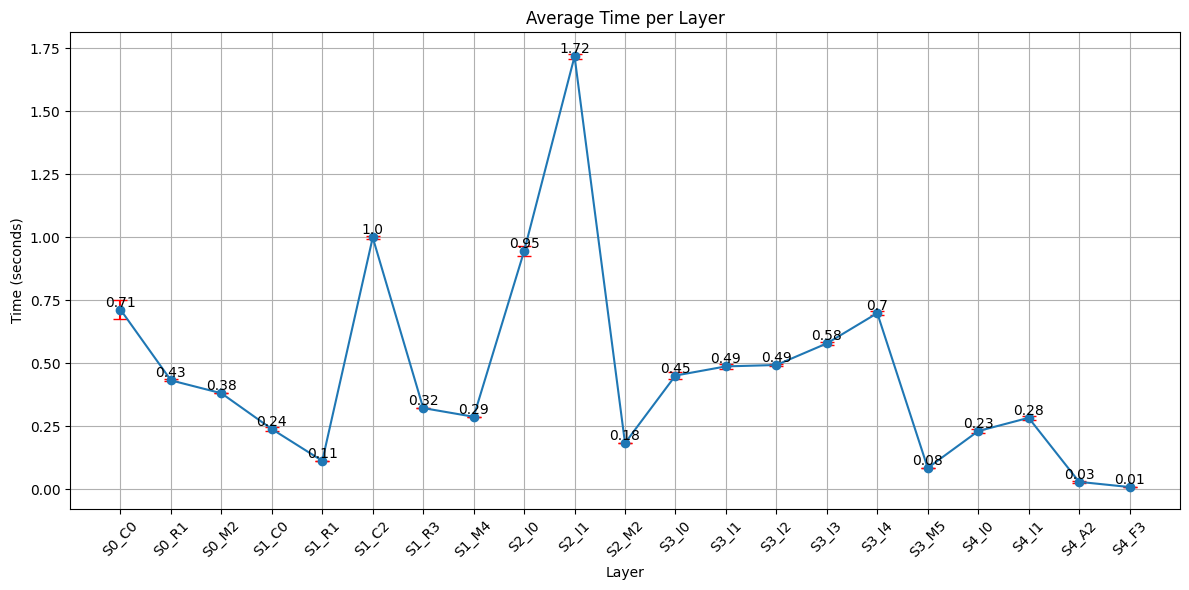

In [8]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_f, axis=1)
layer_stds = np.std(LayersTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [9]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'I' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S2_I0', 'S2_I1', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S4_I0', 'S4_I1']
The inception block indexes are [8, 9, 11, 12, 13, 14, 15, 17, 18]


In [10]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_f[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[1.03118896 0.94011354 0.94137883 0.94188356 0.94076228 0.94023848
  0.94079924 0.94103026 0.94047022 0.94074345 0.94046736 0.9399004
  0.94132972 0.93931365 0.94005966 0.94134665 0.9410696  0.94120169
  0.94058609 0.94094419]
 [1.75950885 1.71369123 1.71583223 1.71666837 1.71616149 1.71544671
  1.717062   1.71621299 1.71747589 1.71609688 1.71596622 1.71554184
  1.71646214 1.71516943 1.71549726 1.71648169 1.71658945 1.71688342
  1.71658516 1.71748877]
 [0.51152039 0.44800282 0.44888139 0.44907451 0.44794607 0.44787455
  0.44933629 0.44835758 0.44852448 0.4486413  0.44829488 0.44809389
  0.44846416 0.44889998 0.44785595 0.44827366 0.44871998 0.44893837
  0.44762516 0.44860554]
 [0.52948046 0.48500514 0.48733521 0.48628974 0.48535919 0.48484206
  0.48631167 0.48529315 0.48567677 0.48578668 0.48576403 0.48539519
  0.48573899 0.48529935 0.48544645 0.48578835 0.48605895 0.48602819
  0.48531604 0.48683286]
 [0.50584555 0.49536896 0.49234319 0.49361277 0.4920764  0.4916

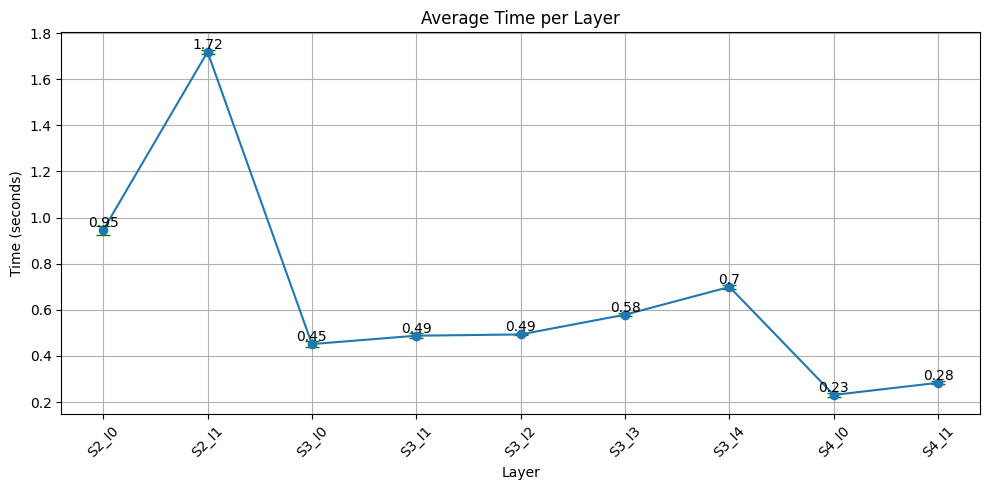

In [11]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

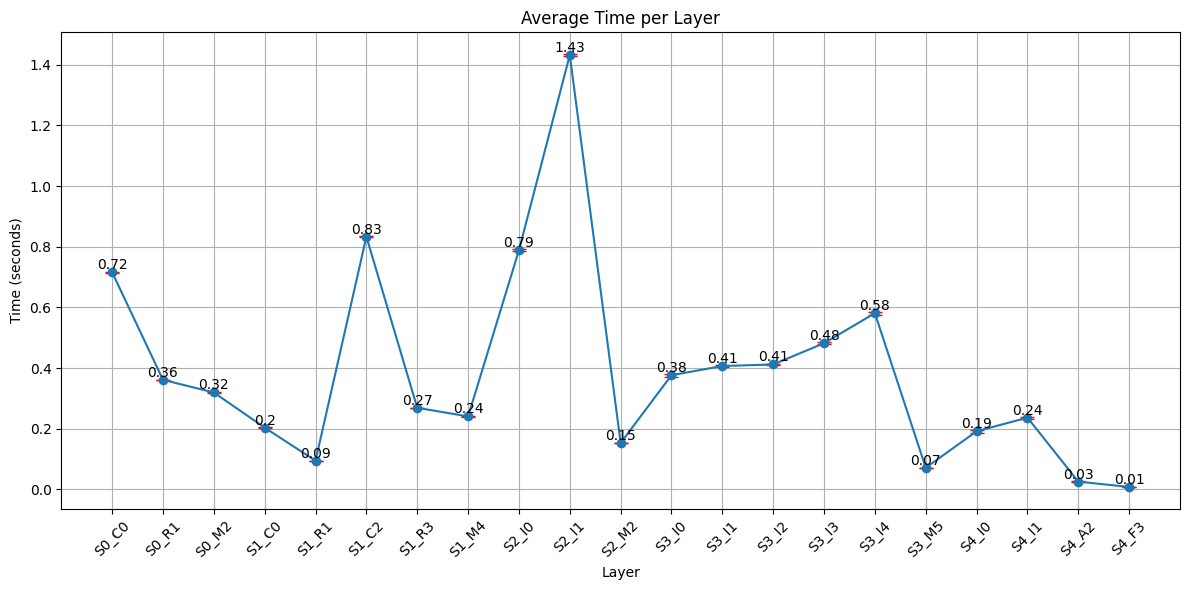

In [12]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_c, axis=1)
layer_stds = np.std(LayersTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [13]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'I' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S2_I0', 'S2_I1', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S4_I0', 'S4_I1']
The inception block indexes are [8, 9, 11, 12, 13, 14, 15, 17, 18]


In [14]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_c[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[0.8053267  0.78729391 0.78794646 0.78510356 0.78641748 0.78774309
  0.78823519 0.78824258 0.7898469  0.78667903 0.787395   0.78676558
  0.78419042 0.78655553 0.78820992 0.78817368 0.78765559 0.78873253
  0.78776503 0.78843212]
 [1.44546485 1.43546772 1.43164563 1.42983699 1.43049741 1.43055296
  1.43062425 1.43125081 1.43144011 1.43441343 1.43051672 1.43053079
  1.42798495 1.43084407 1.43372703 1.43121862 1.43305349 1.43095088
  1.42979574 1.43066645]
 [0.3945303  0.37657118 0.37742019 0.37382984 0.37436843 0.37500024
  0.37690783 0.37562966 0.37606406 0.37802458 0.37480092 0.37698078
  0.37207961 0.3745482  0.37572002 0.37521911 0.37448144 0.37486792
  0.37358689 0.37489724]
 [0.42480707 0.40758467 0.41036844 0.40432763 0.40493083 0.40512681
  0.40511155 0.40549088 0.40507412 0.40483141 0.40710235 0.40509081
  0.40254164 0.40907001 0.40542221 0.40513062 0.40463614 0.40502024
  0.40338635 0.40502453]
 [0.42028642 0.41334105 0.41257119 0.4104197  0.41098809 0.411

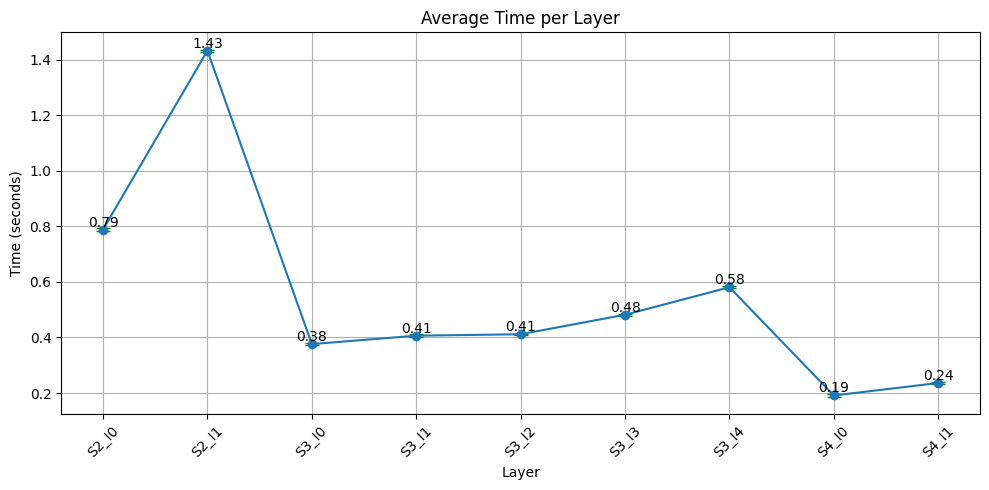

In [15]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [16]:
TrainPartName = ['TimeToDevice', 'Forward', 'Loss', 'Backward', 'Optimization', 'Test']

##### fashionMNIST

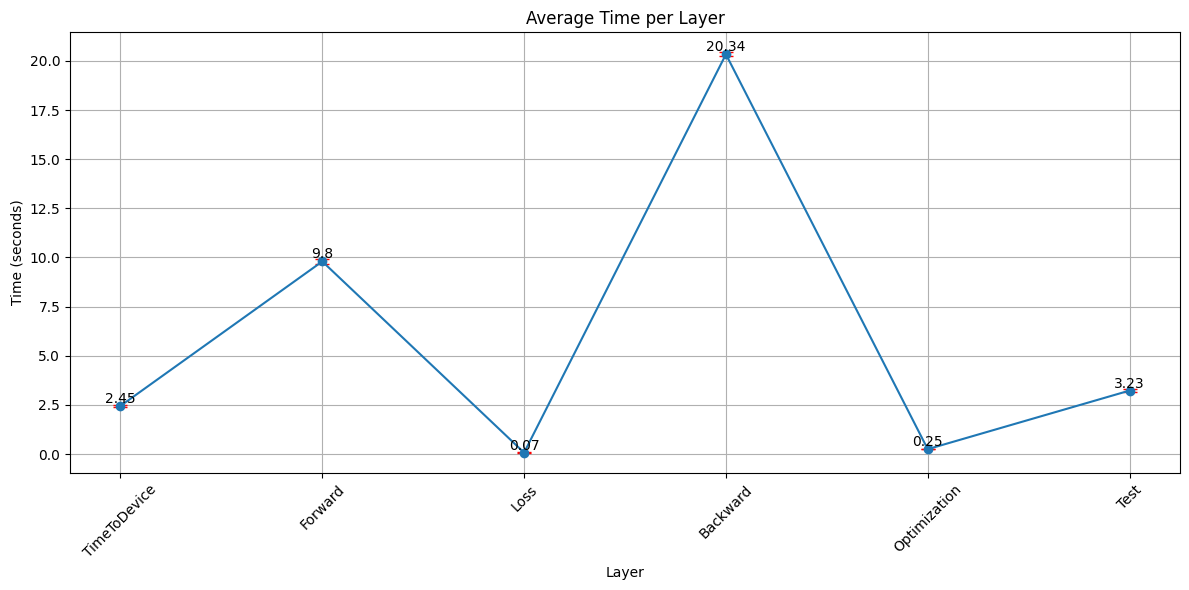

In [17]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_f, axis=1)
trainpart_stds = np.std(TrainPartTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

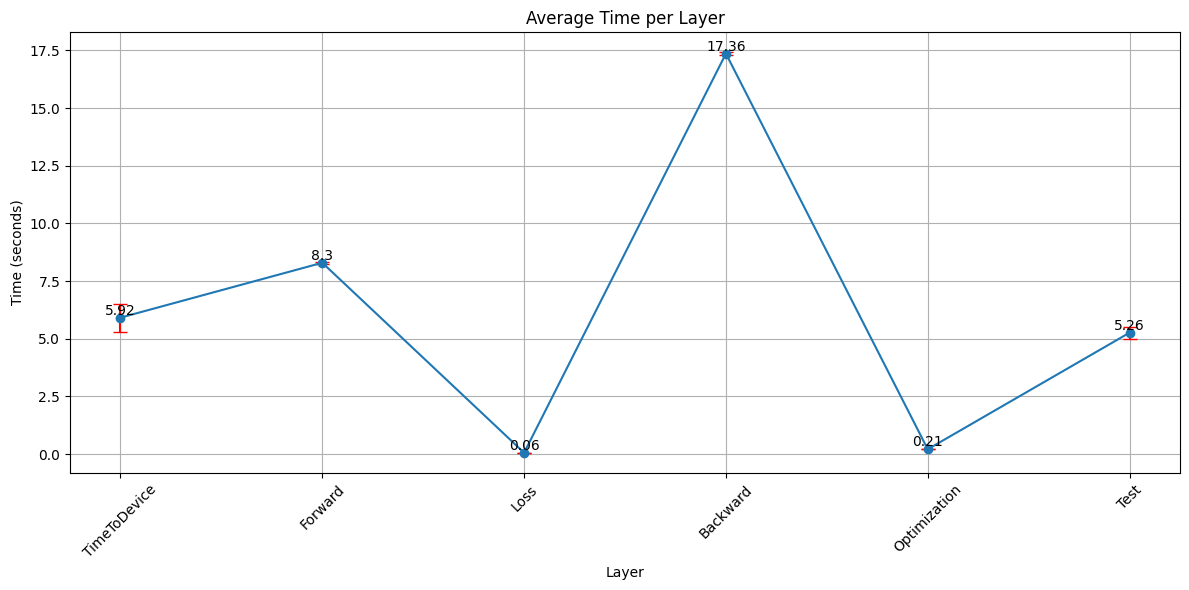

In [18]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_c, axis=1)
trainpart_stds = np.std(TrainPartTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

#### EpochEnergy

##### fashionMNIST

In [19]:
totalEpochEnergy_f = np.zeros((1, epochs[0]))
avgEpochEnergy_f = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_f.shape, avgEpochEnergy_f.shape)

The total energy is: (1, 20) (1, 20)


In [20]:
for i in range(EpochEnergy_f.shape[0]):
    Energy_epoch = EpochEnergy_f[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_f = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_f = np.mean(Energy_epoch)
    totalEnergy_epoch_f = np.round(totalEnergy_epoch_f, 2)
    avgEpochEnergy_epoch_f = np.round(avgEpochEnergy_epoch_f, 2)
    totalEpochEnergy_f[0,i] = totalEnergy_epoch_f
    avgEpochEnergy_f[0,i] = avgEpochEnergy_epoch_f
print(f'The total energy per epoch is: {totalEpochEnergy_f}')
print(f'The average energy per epoch is: {avgEpochEnergy_f}')

The total energy per epoch is: [[10150.61 10548.98 10660.   10773.17 10872.56 10901.34 10921.68 10862.01
  10945.59 10989.74 10971.59 10763.9  10776.04 10991.29 10974.28 10969.85
  10952.59 10889.31 10970.5  10786.53]]
The average energy per epoch is: [[241.68 257.29 260.   262.76 265.18 265.89 266.38 264.93 266.97 268.04
  267.6  269.1  269.4  268.08 267.67 267.56 267.14 265.59 267.57 269.66]]


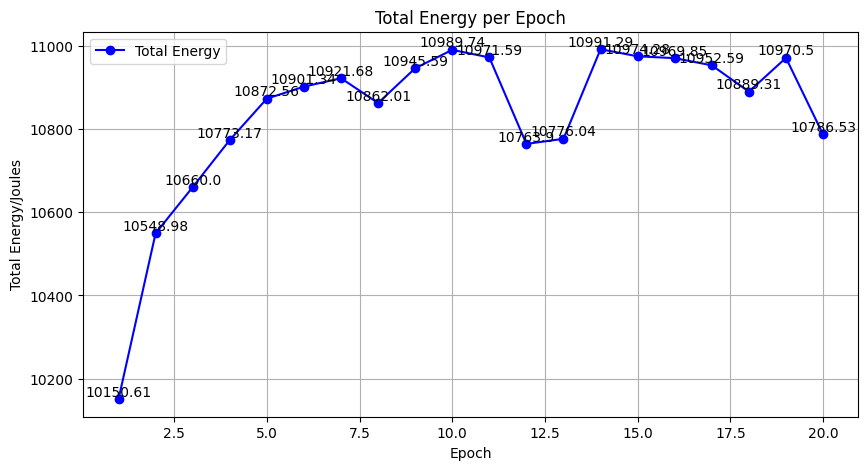

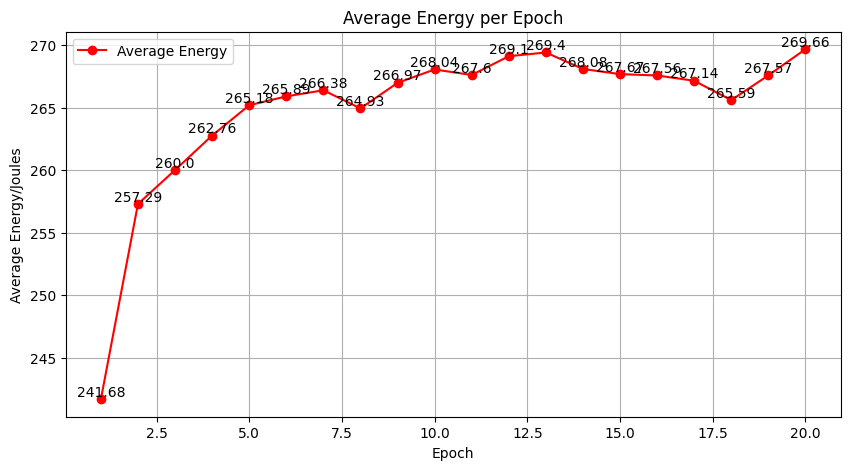

In [21]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], totalEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_f[0,i], avgEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

In [41]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgTotalEnergyEpoch = np.mean(totalEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(totalEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgTotalEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 10833.578, the standard deviation is: 195.13057768069052


In [42]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgEnergyEpoch = np.mean(avgEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(avgEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 264.9245, the standard deviation is: 6.117080574097417


##### cifar100 

In [22]:
totalEpochEnergy_c = np.zeros((1, epochs[0]))
avgEpochEnergy_c = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_c.shape, avgEpochEnergy_c.shape)

The total energy is: (1, 20) (1, 20)


In [23]:
for i in range(EpochEnergy_c.shape[0]):
    Energy_epoch = EpochEnergy_c[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_c = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_c = np.mean(Energy_epoch)
    totalEnergy_epoch_c = np.round(totalEnergy_epoch_c, 2)
    avgEpochEnergy_epoch_c = np.round(avgEpochEnergy_epoch_c, 2)
    totalEpochEnergy_c[0,i] = totalEnergy_epoch_c
    avgEpochEnergy_c[0,i] = avgEpochEnergy_epoch_c
print(f'The total energy per epoch is: {totalEpochEnergy_c}')
print(f'The average energy per epoch is: {avgEpochEnergy_c}')

The total energy per epoch is: [[ 9859.92 10090.29  9979.96  9940.34  9976.7  10066.45 10048.65 10022.31
   9948.9   9876.98  9806.63  9713.5   9717.12  9875.02  9909.3   9895.4
   9852.53  9837.87  9890.14  9927.56]]
The average energy per epoch is: [[205.42 210.21 212.34 216.09 212.27 209.72 209.35 208.8  216.28 219.49
  222.88 220.76 225.98 219.44 220.21 219.9  223.92 223.59 224.78 220.61]]


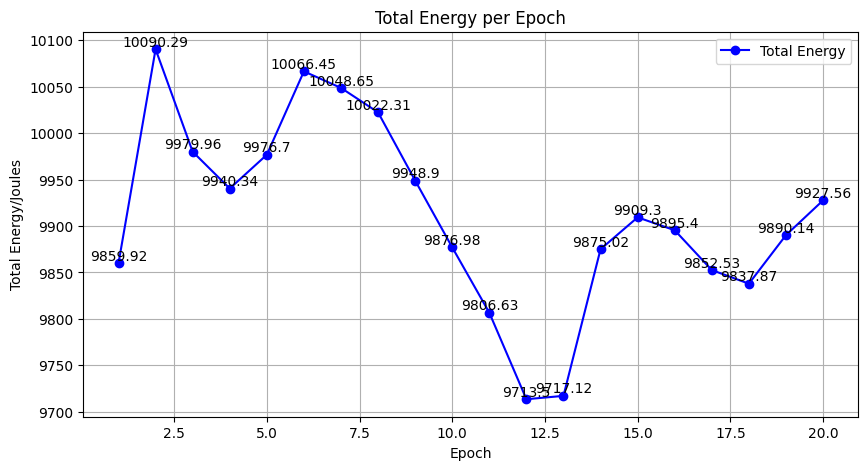

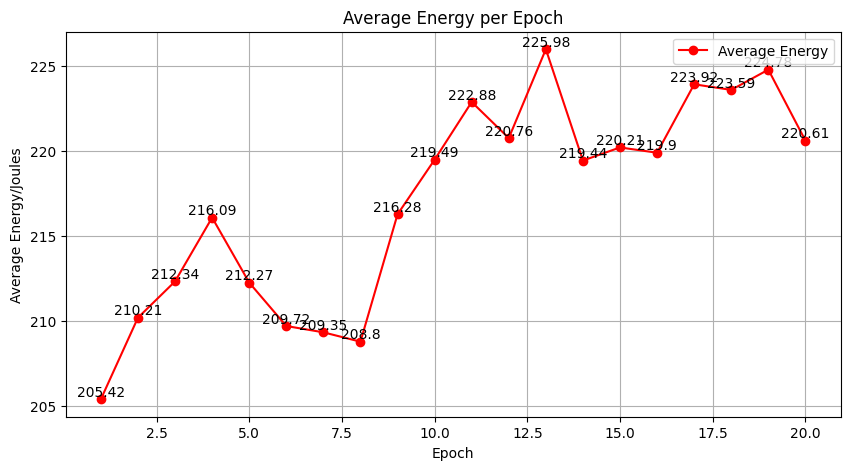

In [24]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_c[0,i], np.round(avgEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

#### EpochTime

##### fashionMNIST

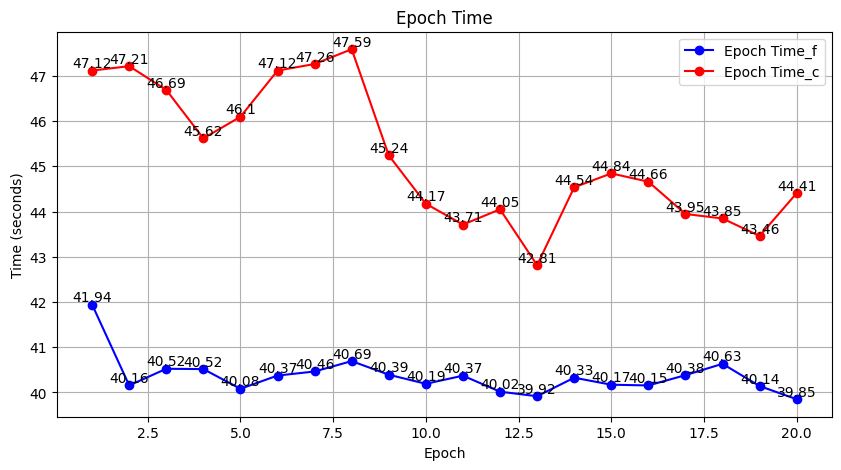

In [26]:
# plot the EpochTime_f and EpochTime_c
epoch_list = np.arange(1, epochs[0]+1)
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, EpochTime_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Epoch Time_f')
plt.plot(epoch_list, EpochTime_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Epoch Time_c')
plt.title('Epoch Time')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], EpochTime_f[i], np.round(EpochTime_f[i], 2), ha='center', va='bottom')
    plt.text(epoch_list[i], EpochTime_c[i], np.round(EpochTime_c[i], 2), ha='center', va='bottom')
plt.show()

In [27]:
EpochTime_f

array([41.94174123, 40.15527511, 40.52331996, 40.51642871, 40.08085394,
       40.37309027, 40.46329331, 40.6930449 , 40.39175844, 40.19113731,
       40.37067103, 40.01702189, 39.91611338, 40.3259728 , 40.17121577,
       40.15452695, 40.3822    , 40.63286638, 40.14094472, 39.85017872])

##### cifar100

In [28]:
EpochTime_c

array([47.11707163, 47.2144053 , 46.68849349, 45.61786294, 46.09502316,
       47.11629438, 47.26203918, 47.58877277, 45.24108338, 44.172122  ,
       43.71117377, 44.04889369, 42.81411767, 44.53561974, 44.84305573,
       44.65956402, 43.94621158, 43.84601998, 43.45965195, 44.40661788])